# 6.2 Exploring Relationships

## Table of Contents

### 1. Importing Data Visualization Libraries

### 2. Remove Unnecessary Variables for Analysis

### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots

### 4. Previous Exploratory Questions

### 5. Hypotheses

## 1. Importing Data Visualization Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Check matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
#Code to display charts without calling them
%matplotlib inline

In [4]:
#Create a path
path = r'C:\Users\dyl41\Documents\Quality of Life Project'

In [5]:
#Import dataset
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Quality of Life.csv'), index_col = False)

## 2. Remove Unnecessary Variables for Analysis

In [6]:
#View all columns in dataset
list(df.columns)

['Rank',
 'Country',
 'Stability',
 'Rights',
 'Health',
 'Safety',
 'Climate',
 'Costs',
 'Popularity',
 'TotalQualityofLife']

<B>The dataset has been cleaned and all variables will be used in the analysis

In [7]:
dfe = df[['Rank', 'Stability', 'Rights', 'Health', 'Safety', 'Climate', 'Costs', 'Popularity', 'TotalQualityofLife']]

## 3. Exploring Relationships

In [8]:
# Create a correlation matrix using pandas

dfe.corr()

,Rank,Stability,Rights,Health,Safety,Climate,Costs,Popularity,TotalQualityofLife
Rank,1.000000,-0.854773,-0.898624,-0.860273,-0.745916,0.290288,0.348676,-0.194295,-0.989193
Stability,-0.854773,1.000000,0.846775,0.693995,0.594684,-0.431277,-0.362504,0.050028,0.858164
Rights,-0.898624,0.846775,1.000000,0.761785,0.619760,-0.454947,-0.507847,0.134911,0.895649
Health,-0.860273,0.693995,0.761785,1.000000,0.665243,-0.429862,-0.365072,0.070092,0.861517
Safety,-0.745916,0.594684,0.619760,0.665243,1.000000,-0.355940,-0.227878,0.127974,0.763213
Climate,0.290288,-0.431277,-0.454947,-0.429862,-0.355940,1.000000,0.081682,0.017996,-0.260525
Costs,0.348676,-0.362504,-0.507847,-0.365072,-0.227878,0.081682,1.000000,-0.286255,-0.356321
Popularity,-0.194295,0.050028,0.134911,0.070092,0.127974,0.017996,-0.286255,1.000000,0.192992
TotalQualityofLife,-0.989193,0.858164,0.895649,0.861517,0.763213,-0.260525,-0.356321,0.192992,1.000000


In [9]:
#current dir

cwd = os.getcwd()
cwd

'C:\\Users\\dyl41\\Documents\\Quality of Life Project\\Scripts'

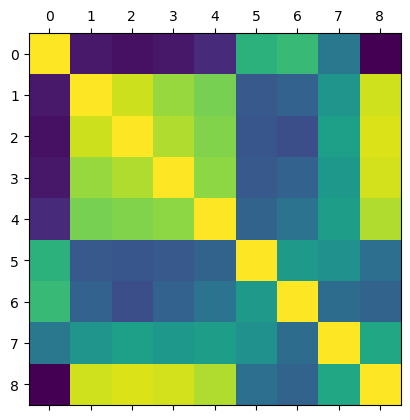

In [10]:
# Create a correlation heatmap using matplotlib

plt.matshow(dfe.corr())

Text(0.5, 1.0, 'Correlation Matrix')

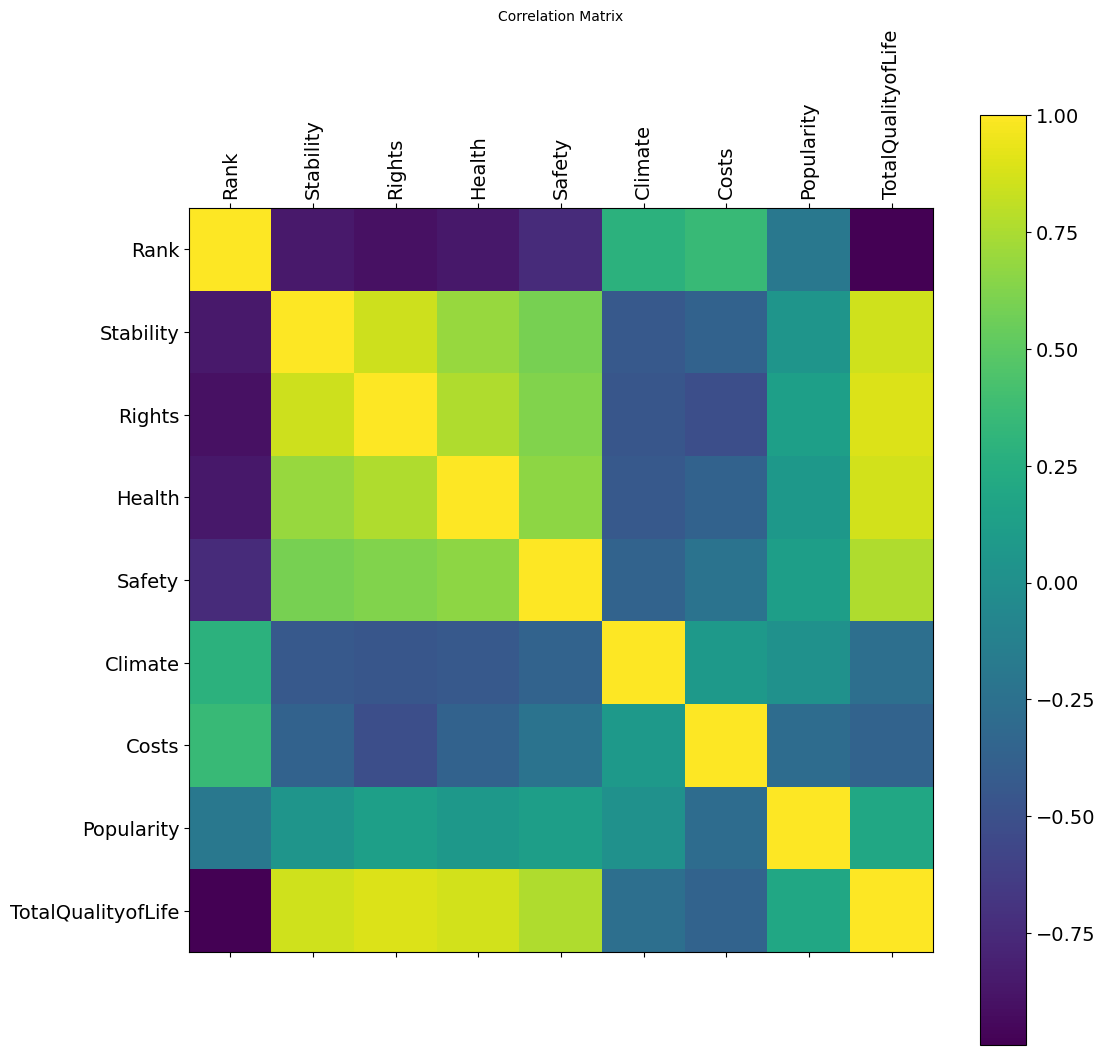

In [11]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(12, 12)) # figure size 
plt.matshow(dfe.corr(), fignum=f.number) # type of plot
plt.xticks(range(dfe.shape[1]), dfe.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(dfe.shape[1]), dfe.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=10) # add title

### Create a correlation heatmap using seaborn

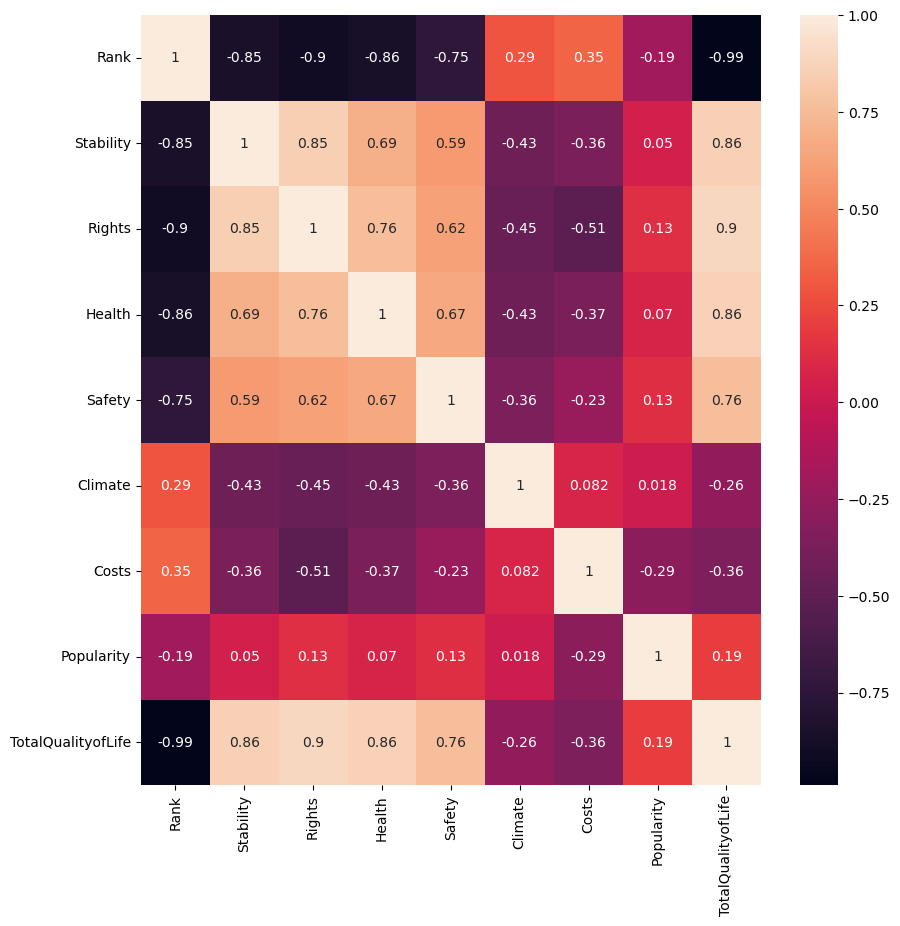

In [12]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(dfe.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Using 'Total Quality of Life' as an indepdent variable for comparison, the heatmap shows the dependent variables 'Stability', 'Rights', 'Health', and 'Safety' all have a strong positive correlation, with 0.86, 0.9, 0.86, and 0.76 as their correlation scores, respecitvely. There is also a weak positive correlation between 'Total Quality of Life' and 'Popularity', but at a score of 0.19, this can probably be viewed as insignificant.

### Scatterplots

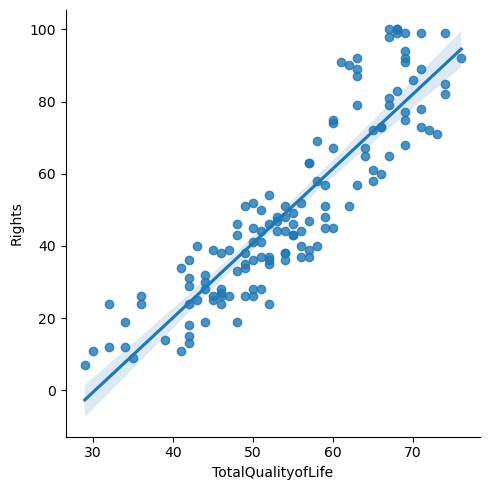

In [13]:
# Create a scatterplot for the "Total Quality of Life" and "Rights" columns in seaborn

sns.lmplot(x = 'TotalQualityofLife', y = 'Rights', data = dfe)

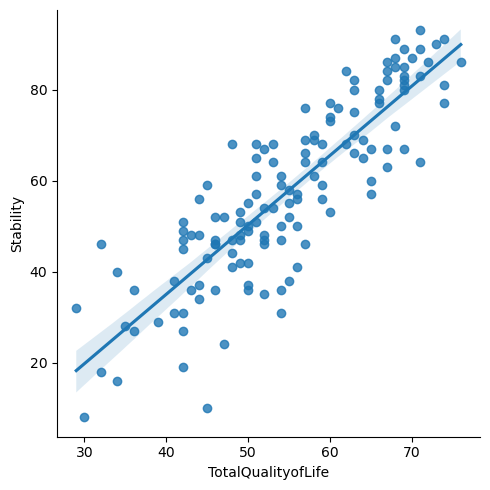

In [14]:
# Create a scatterplot for the "Total Quality of Life" and "Stability" columns in seaborn

sns.lmplot(x = 'TotalQualityofLife', y = 'Stability', data = dfe)

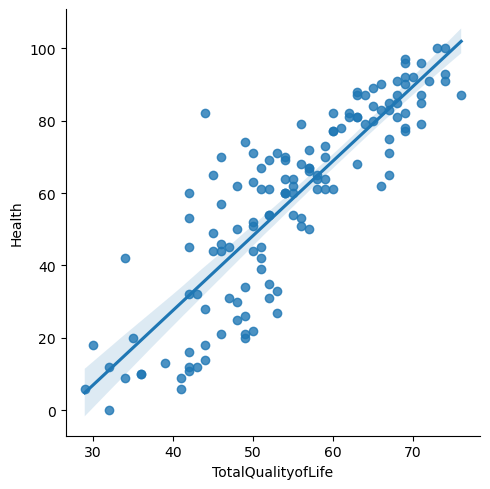

In [15]:
# Create a scatterplot for the "Total Quality of Life" and "Health" columns in seaborn

sns.lmplot(x = 'TotalQualityofLife', y = 'Health', data = dfe)

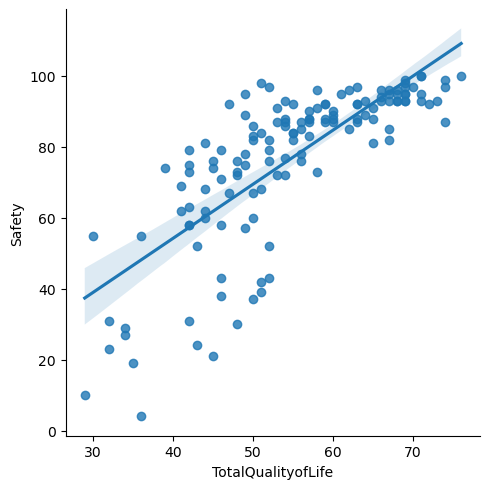

In [16]:
# Create a scatterplot for the "Total Quality of Life" and "Safety" columns in seaborn

sns.lmplot(x = 'TotalQualityofLife', y = 'Safety', data = dfe)

With the four scatterplots above, there are strong positive relationships between the independent variable Total Quality of Life and the dependent variables Rights, Stability, Health, and Safety. All data points are close to the trend line, indicating a strong correlation between the variables. 

### Pair Plots

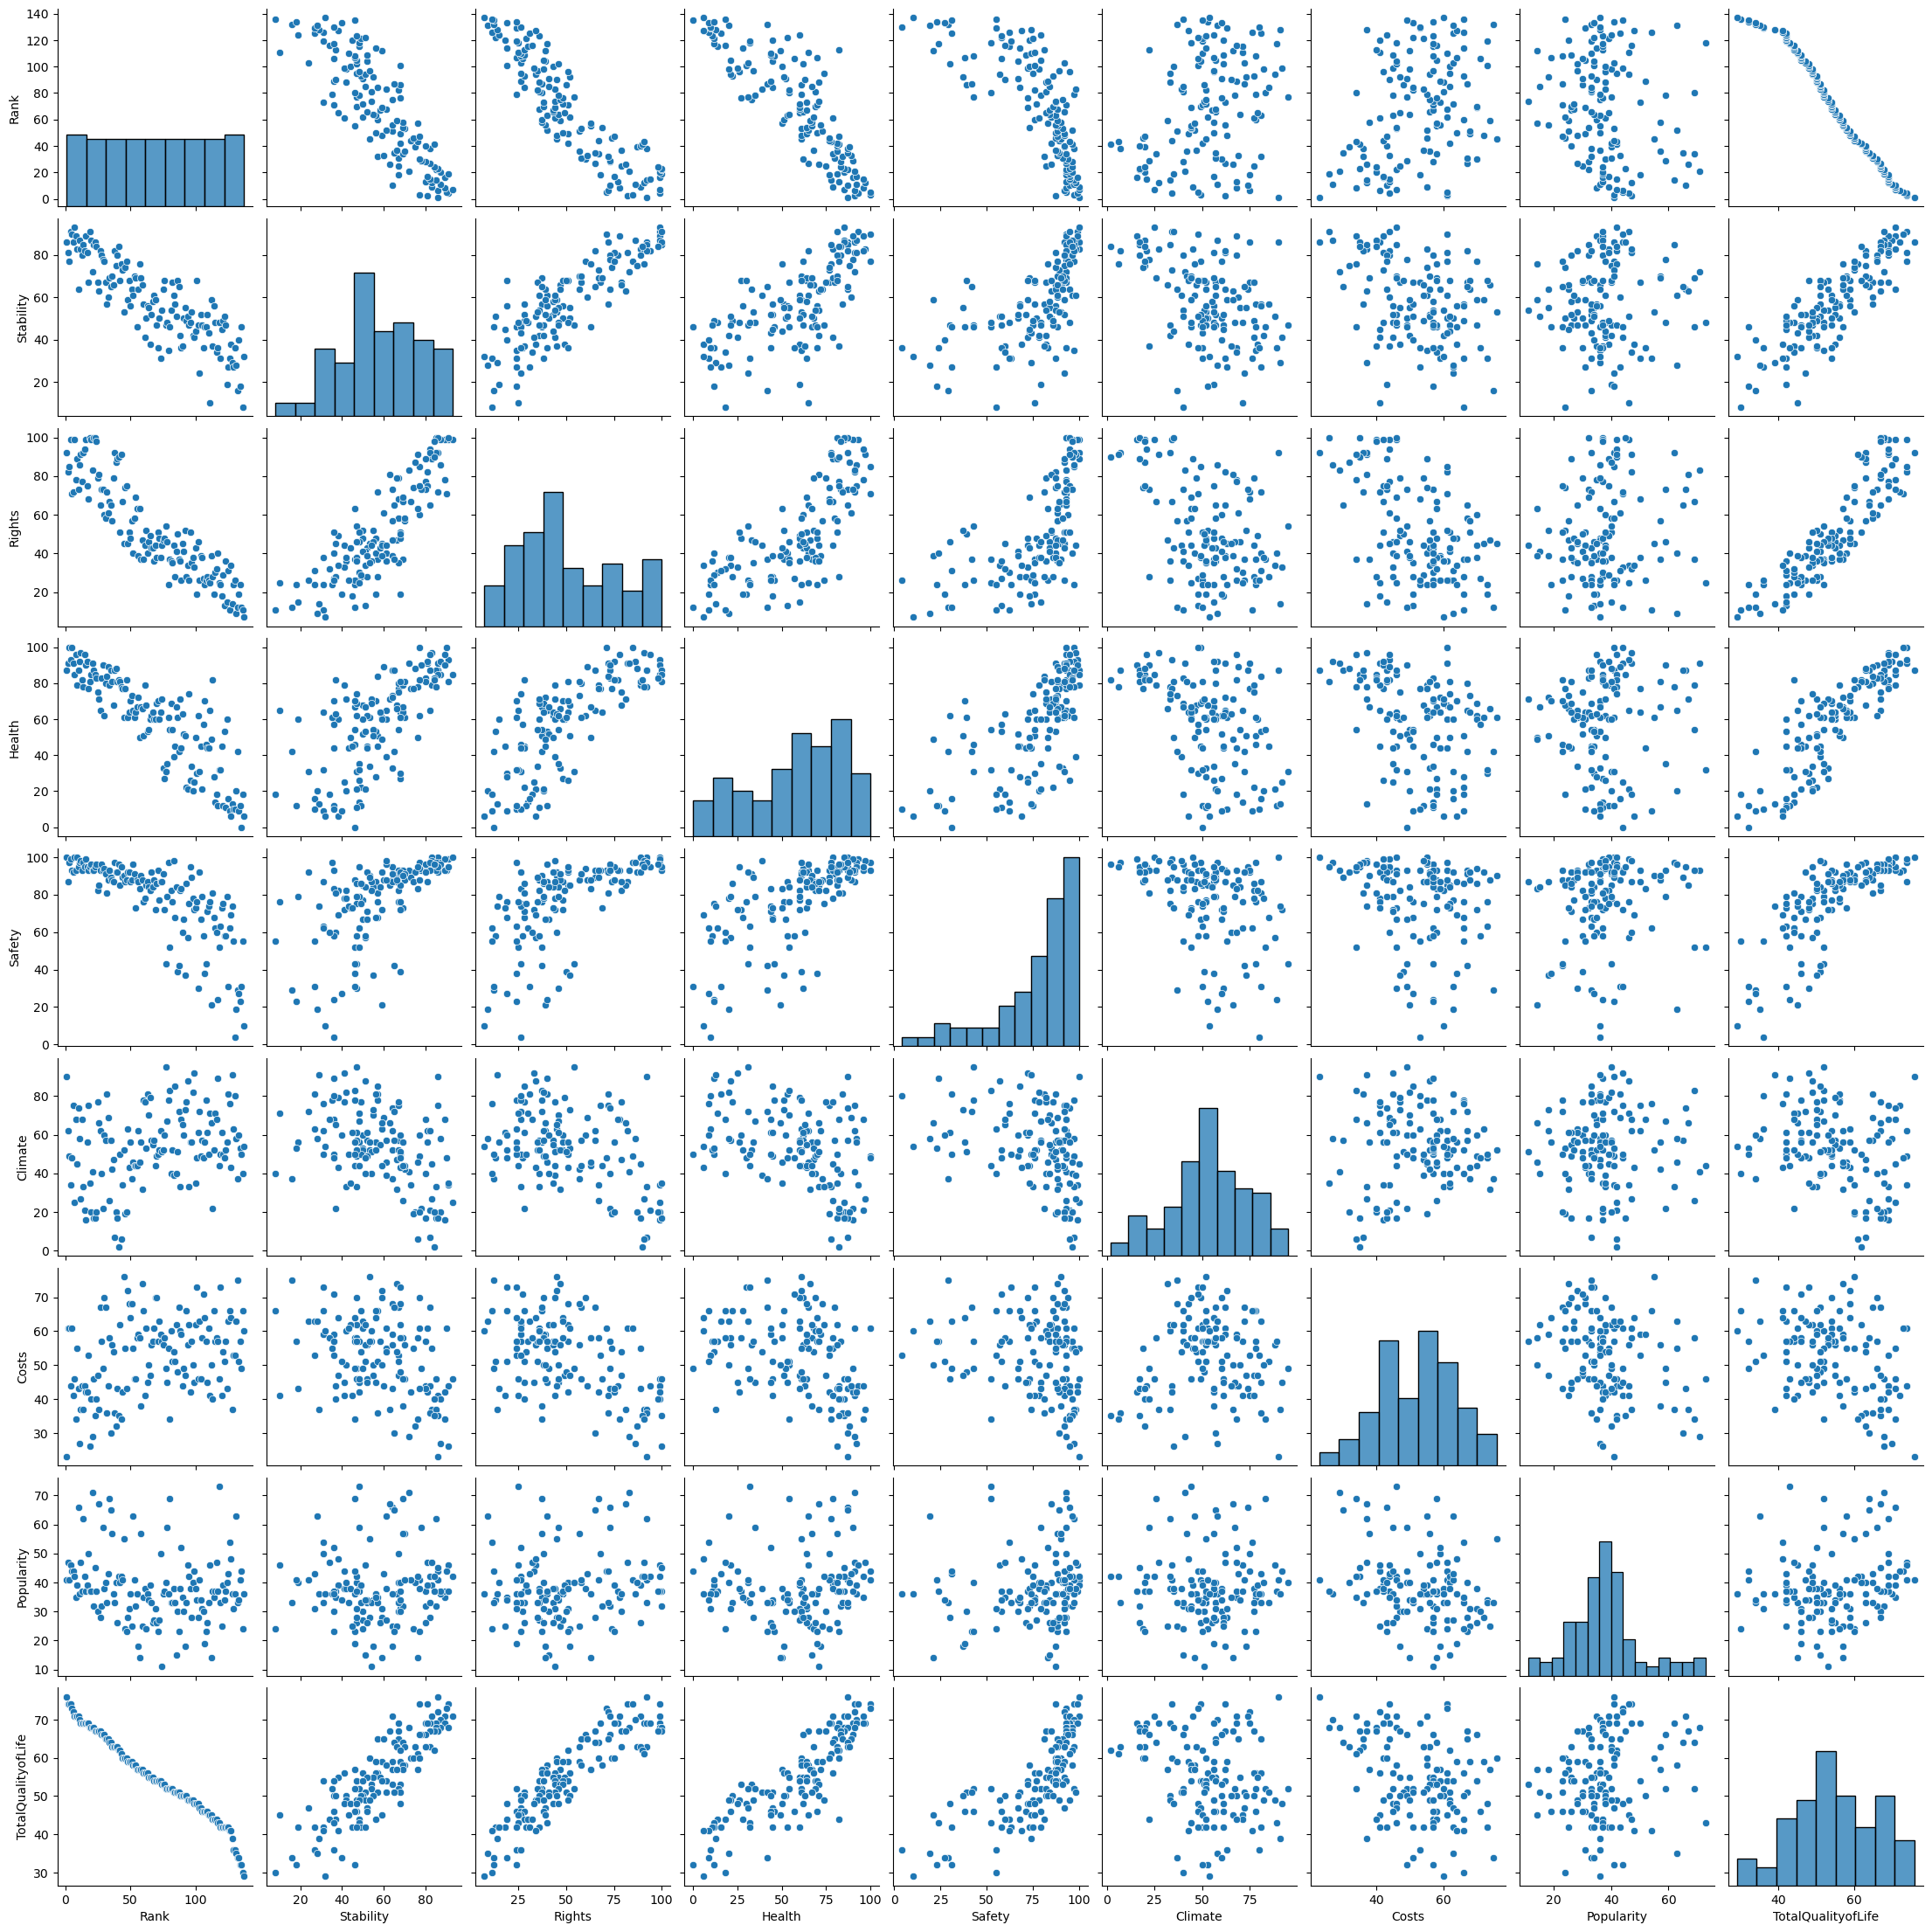

In [17]:
# Create a pair plot of the entire set

g = sns.pairplot(dfe)

Based on the pairplot results, I don't believe any of the dependent variables would be worth exploring in greater detail, as they do not show strong correlations; however, Total Quality of Life does seem to show a relationship with Rank, although this is to be expected, as the highest ranked countries have the Highest Quality of Life rankings.

### Categorical Plots

<AxesSubplot:xlabel='TotalQualityofLife', ylabel='Count'>

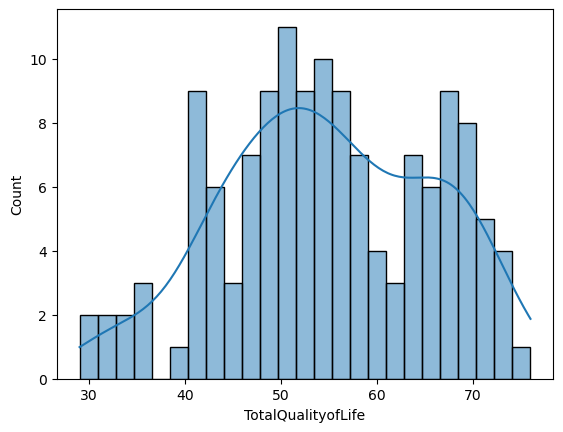

In [18]:
# Use a histogram to visualize the distribution of the variables.
sns.histplot(df['TotalQualityofLife'], bins = 25, kde = True)

In [19]:
#Create Quality of Life Rankings
df.loc[df['TotalQualityofLife'] <= 47, 'Quality of Life Ranking'] = 'Lowest Quality of Life'
df.loc[(df['TotalQualityofLife']>= 48)&(df['TotalQualityofLife'] <= 61), 'Quality of Life Ranking'] = 'Better Quality of Life'
df.loc[df['TotalQualityofLife'] >= 62, 'Quality of Life Ranking'] = 'Best Quality of Life'

In [20]:
#View the categories
df['Quality of Life Ranking'].value_counts(dropna = False)

Better Quality of Life    60
Best Quality of Life      42
Lowest Quality of Life    35
Name: Quality of Life Ranking, dtype: int64

In [21]:
df.columns

Index(['Rank', 'Country', 'Stability', 'Rights', 'Health', 'Safety', 'Climate',
       'Costs', 'Popularity', 'TotalQualityofLife', 'Quality of Life Ranking'],
      dtype='object')

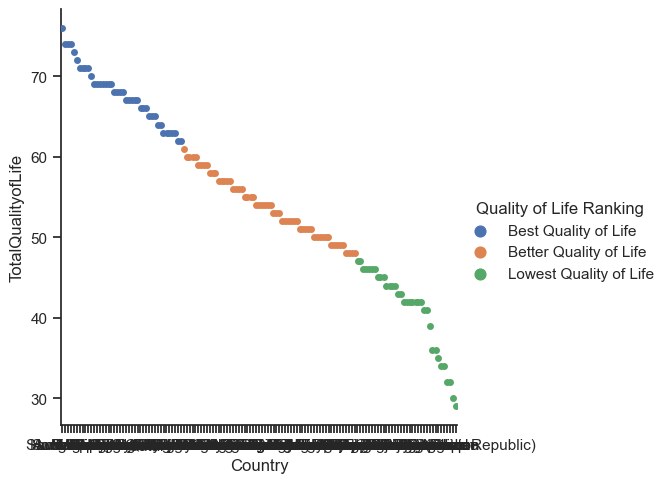

In [22]:
# Create a categorical plot in seaborn using the Quality of Life Rankings categories created above
sns.set(style="ticks")
g = sns.catplot(x="Country", y="TotalQualityofLife", hue="Quality of Life Ranking", data=df)

The categorical plot shows a fairly even distribution between the three categories (best quality of life, better quality of life, and lowest quality of life). Better quality of life countries have the largest count of data points, followed by best quality of life, and lowest quality of life.

Question:

"How is quality of life determined?"

Hypothesis based on results of this analysis:

"The countries with the best total quality of life have strong rankings in rights, stability, health, and safety."

In [23]:
df.head()

,Rank,Country,Stability,Rights,Health,Safety,Climate,Costs,Popularity,TotalQualityofLife,Quality of Life Ranking
0,1,Australia,86,92,87,100,90,23,41,76,Best Quality of Life
1,2,San Marino,81,82,91,87,62,61,47,74,Best Quality of Life
2,3,Hong Kong,77,85,100,97,49,61,41,74,Best Quality of Life
3,4,Switzerland,91,99,93,99,34,44,46,74,Best Quality of Life
4,5,Macao,90,71,100,93,48,61,44,73,Best Quality of Life


## Export the Dataframe

In [25]:
dfe.corr()

,Rank,Stability,Rights,Health,Safety,Climate,Costs,Popularity,TotalQualityofLife
Rank,1.000000,-0.854773,-0.898624,-0.860273,-0.745916,0.290288,0.348676,-0.194295,-0.989193
Stability,-0.854773,1.000000,0.846775,0.693995,0.594684,-0.431277,-0.362504,0.050028,0.858164
Rights,-0.898624,0.846775,1.000000,0.761785,0.619760,-0.454947,-0.507847,0.134911,0.895649
Health,-0.860273,0.693995,0.761785,1.000000,0.665243,-0.429862,-0.365072,0.070092,0.861517
Safety,-0.745916,0.594684,0.619760,0.665243,1.000000,-0.355940,-0.227878,0.127974,0.763213
Climate,0.290288,-0.431277,-0.454947,-0.429862,-0.355940,1.000000,0.081682,0.017996,-0.260525
Costs,0.348676,-0.362504,-0.507847,-0.365072,-0.227878,0.081682,1.000000,-0.286255,-0.356321
Popularity,-0.194295,0.050028,0.134911,0.070092,0.127974,0.017996,-0.286255,1.000000,0.192992
TotalQualityofLife,-0.989193,0.858164,0.895649,0.861517,0.763213,-0.260525,-0.356321,0.192992,1.000000


In [27]:
dfe

,Rank,Stability,Rights,Health,Safety,Climate,Costs,Popularity,TotalQualityofLife
0,1,86,92,87,100,90,23,41,76
1,2,81,82,91,87,62,61,47,74
2,3,77,85,100,97,49,61,41,74
3,4,91,99,93,99,34,44,46,74
4,5,90,71,100,93,48,61,44,73
...,...,...,...,...,...,...,...,...,...
132,133,40,19,9,27,60,51,34,34
133,134,18,24,12,23,53,57,41,32
134,135,46,12,0,31,50,49,44,32
135,136,8,11,18,55,40,66,24,30
